# 📊 Extracting and Visualizing Stock Data (IBM Project)

This notebook includes all 7 questions required for the IBM Data Science project, using **yfinance**, **web scraping**, and **plotly** to analyze and visualize stock and revenue data for **Tesla** and **GameStop**.

## Question 1: Use yfinance to Extract Tesla Stock Data

In [9]:
import yfinance as yf

# Create ticker object for Tesla
tesla = yf.Ticker('TSLA')

# Extract stock data for maximum period
tesla_data = tesla.history(period='max')

# Reset index and show first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Web Scraping to Extract Tesla Revenue Data

In [10]:
import pandas as pd
import requests
from io import StringIO

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# We add headers to avoid the 403 error
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url_tesla, headers=headers)
response.raise_for_status()

tables = pd.read_html(StringIO(response.text))

tesla_revenue = tables[1].copy()
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
tesla_revenue.dropna(inplace=True)

display(tesla_revenue.tail())
tesla_revenue.to_csv("tesla_revenue.csv", index=False)

,Date,Revenue
55,2011-12-31,39
56,2011-09-30,58
57,2011-06-30,58
58,2011-03-31,49
59,2010-12-31,36


## Question 3: Use yfinance to Extract GameStop Stock Data

In [11]:
# Create ticker object for GameStop
gamestop = yf.Ticker('GME')

# Extract stock data for maximum period
gamestop_data = gamestop.history(period='max')
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Web Scraping to Extract GameStop Revenue Data

In [12]:
import pandas as pd
import requests
from io import StringIO

url_gamestop = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url_gamestop, headers=headers)
response.raise_for_status()

tables_gme = pd.read_html(StringIO(response.text))

gme_revenue = tables_gme[1].copy()
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
gme_revenue.dropna(inplace=True)

display(gme_revenue.tail())

gme_revenue.to_csv("gme_revenue.csv", index=False)

,Date,Revenue
54,2012-01-31,3579
55,2011-10-31,1947
56,2011-07-31,1744
57,2011-04-30,2281
58,2011-01-31,3693


## Question 5: Tesla Stock and Revenue Dashboard

In [13]:
import dash
from dash import dcc, html
import plotly.graph_objects as go

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

fig_price = go.Figure()
fig_price.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], name="Close Price"))
fig_price.update_layout(title="Tesla Stock Price (Close)", xaxis_title="Date", yaxis_title="Price (USD)")

fig_revenue = go.Figure()
fig_revenue.add_trace(go.Bar(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name="Revenue"))
fig_revenue.update_layout(title="Tesla Quarterly Revenue", xaxis_title="Date", yaxis_title="Revenue (USD)")

app = dash.Dash(__name__)
app.layout = html.Div(children=[
    html.H1("Tesla: Stock Price & Revenue Dashboard"),
    dcc.Graph(figure=fig_price),
    dcc.Graph(figure=fig_revenue)
])


fig_price.write_html("tesla_price.html")
fig_revenue.write_html("tesla_revenue.html")

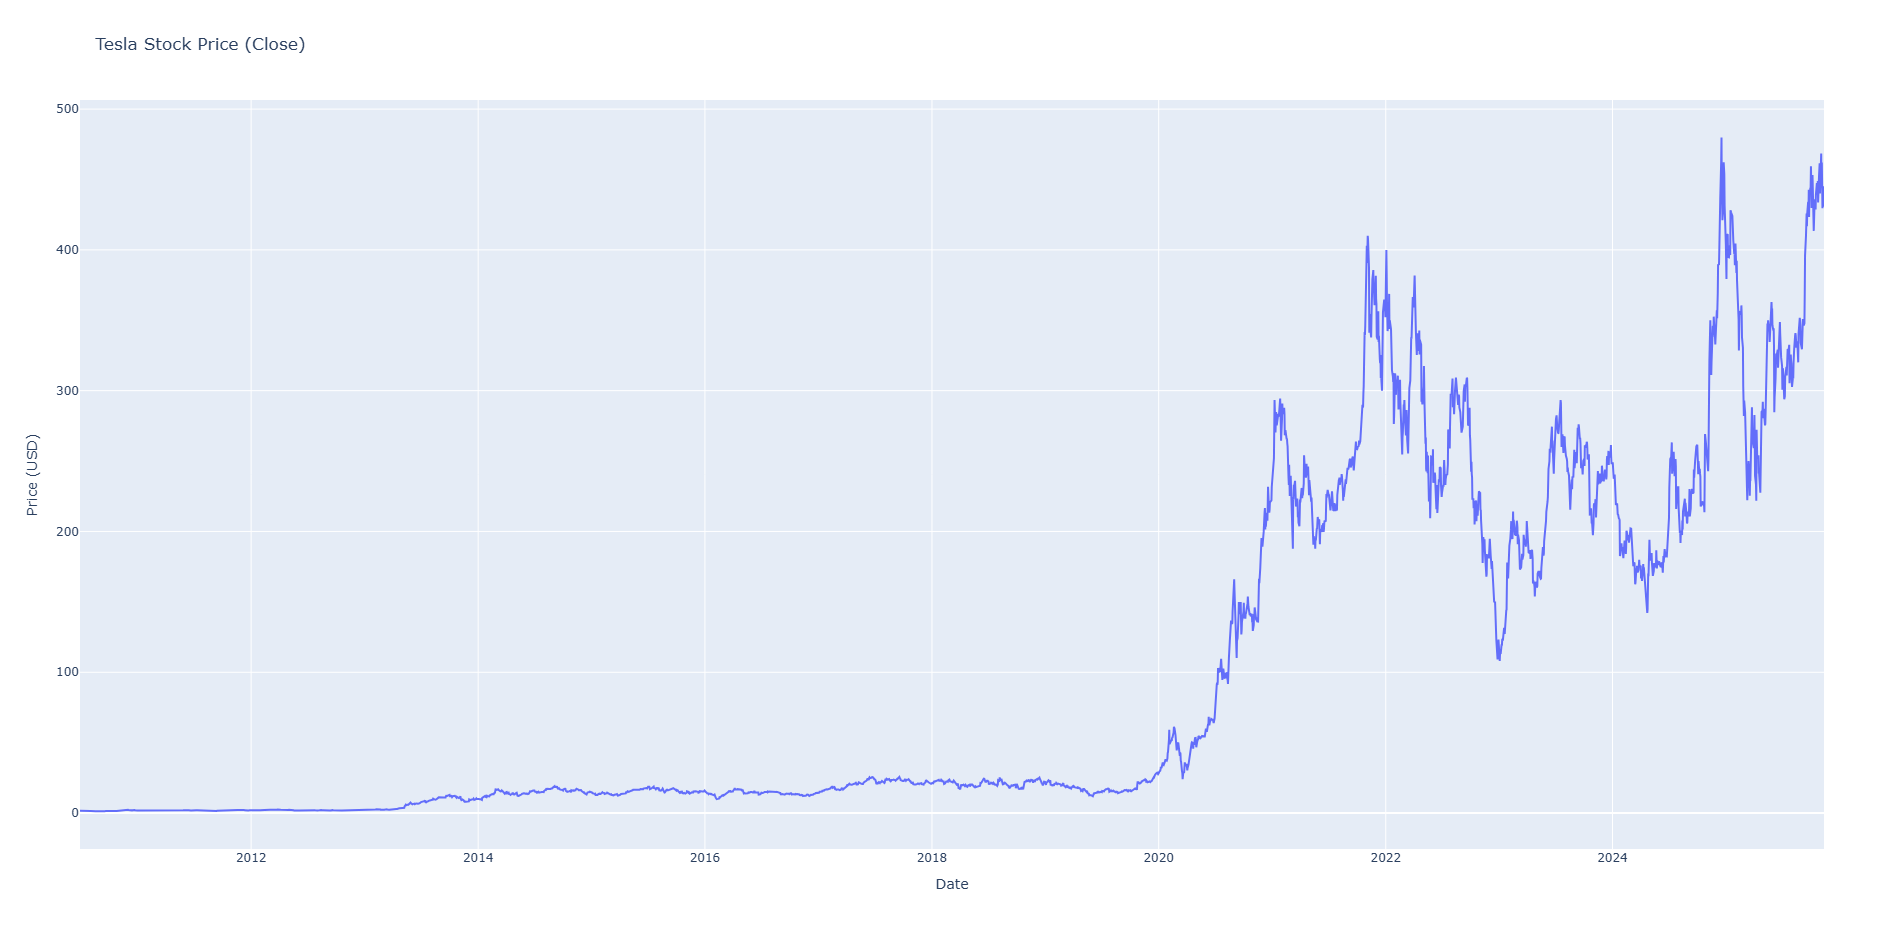

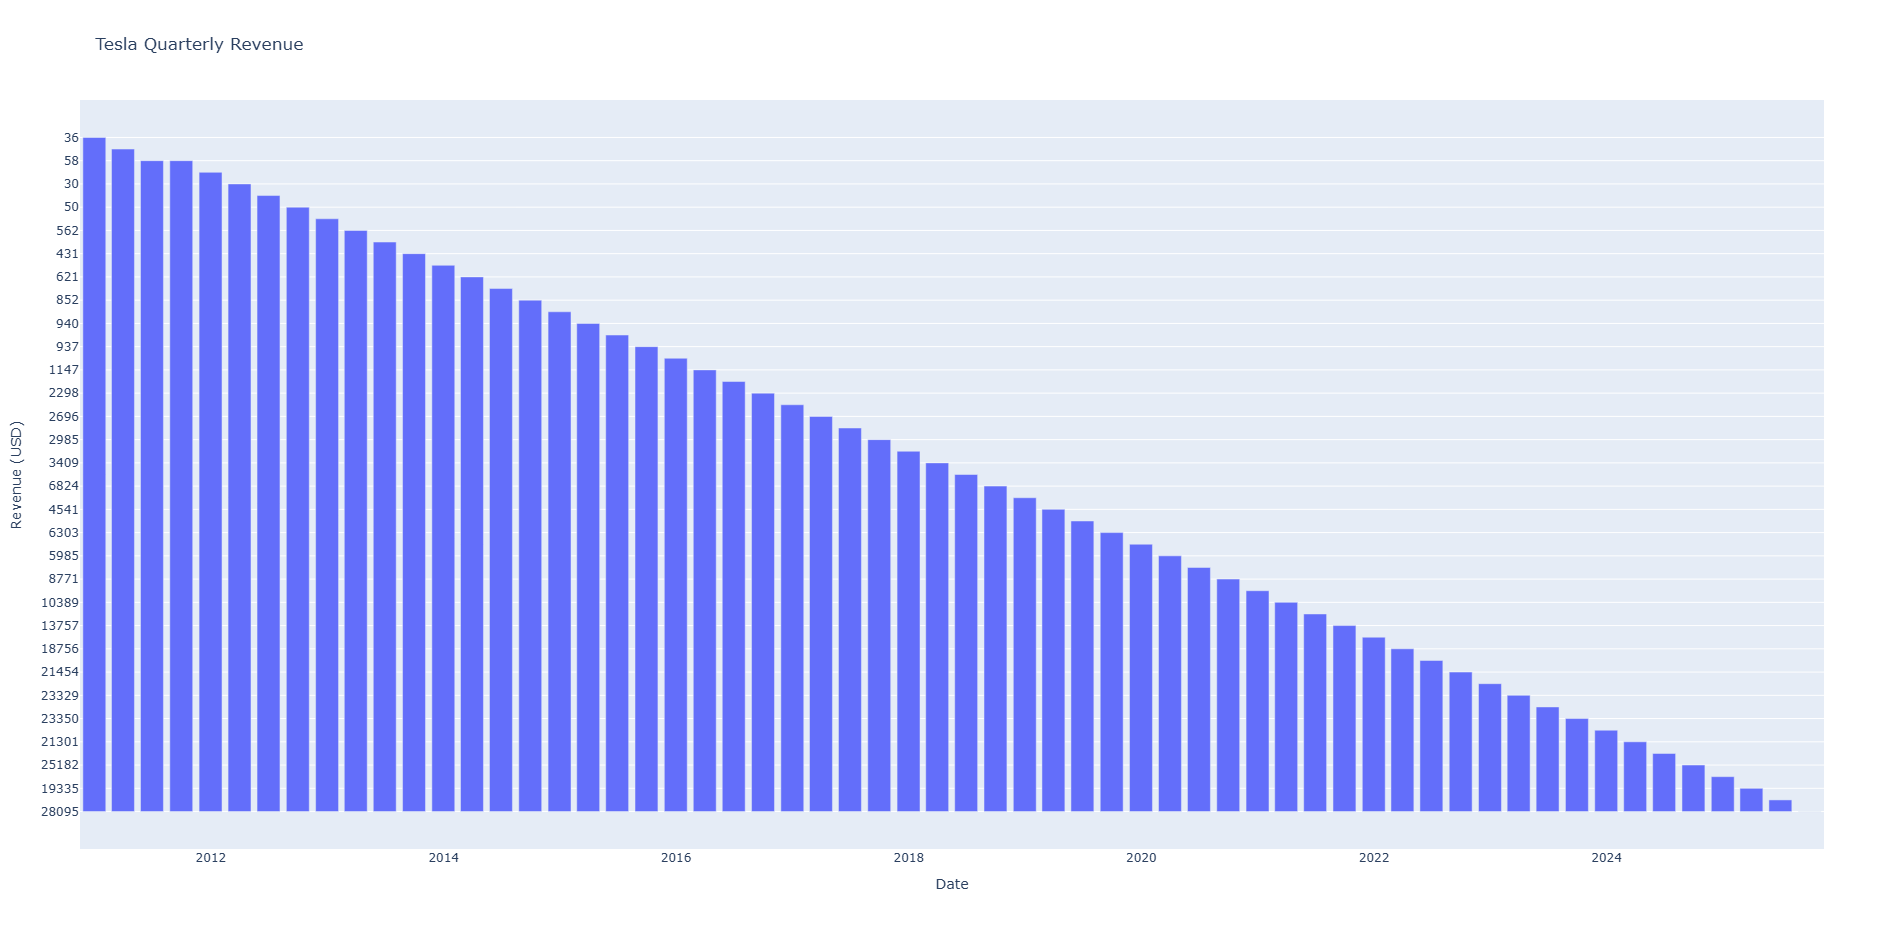

In [14]:
from IPython.display import display, Image

display(Image("tesla_price.png", width=400))
display(Image("tesla_revenue.png", width=400))

## Question 6: GameStop Stock and Revenue Dashboard

In [15]:
gamestop_data['Date'] = pd.to_datetime(gamestop_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

fig_price_gme = go.Figure()
fig_price_gme.add_trace(go.Scatter(x=gamestop_data['Date'], y=gamestop_data['Close'], name="Close Price"))
fig_price_gme.update_layout(title="GameStop Stock Price (Close)", xaxis_title="Date", yaxis_title="Price (USD)")

fig_revenue_gme = go.Figure()
fig_revenue_gme.add_trace(go.Bar(x=gme_revenue['Date'], y=gme_revenue['Revenue'], name="Revenue"))
fig_revenue_gme.update_layout(title="GameStop Quarterly Revenue", xaxis_title="Date", yaxis_title="Revenue (USD)")

fig_price_gme.write_html("gme_price.html")
fig_revenue_gme.write_html("gme_revenue.html")

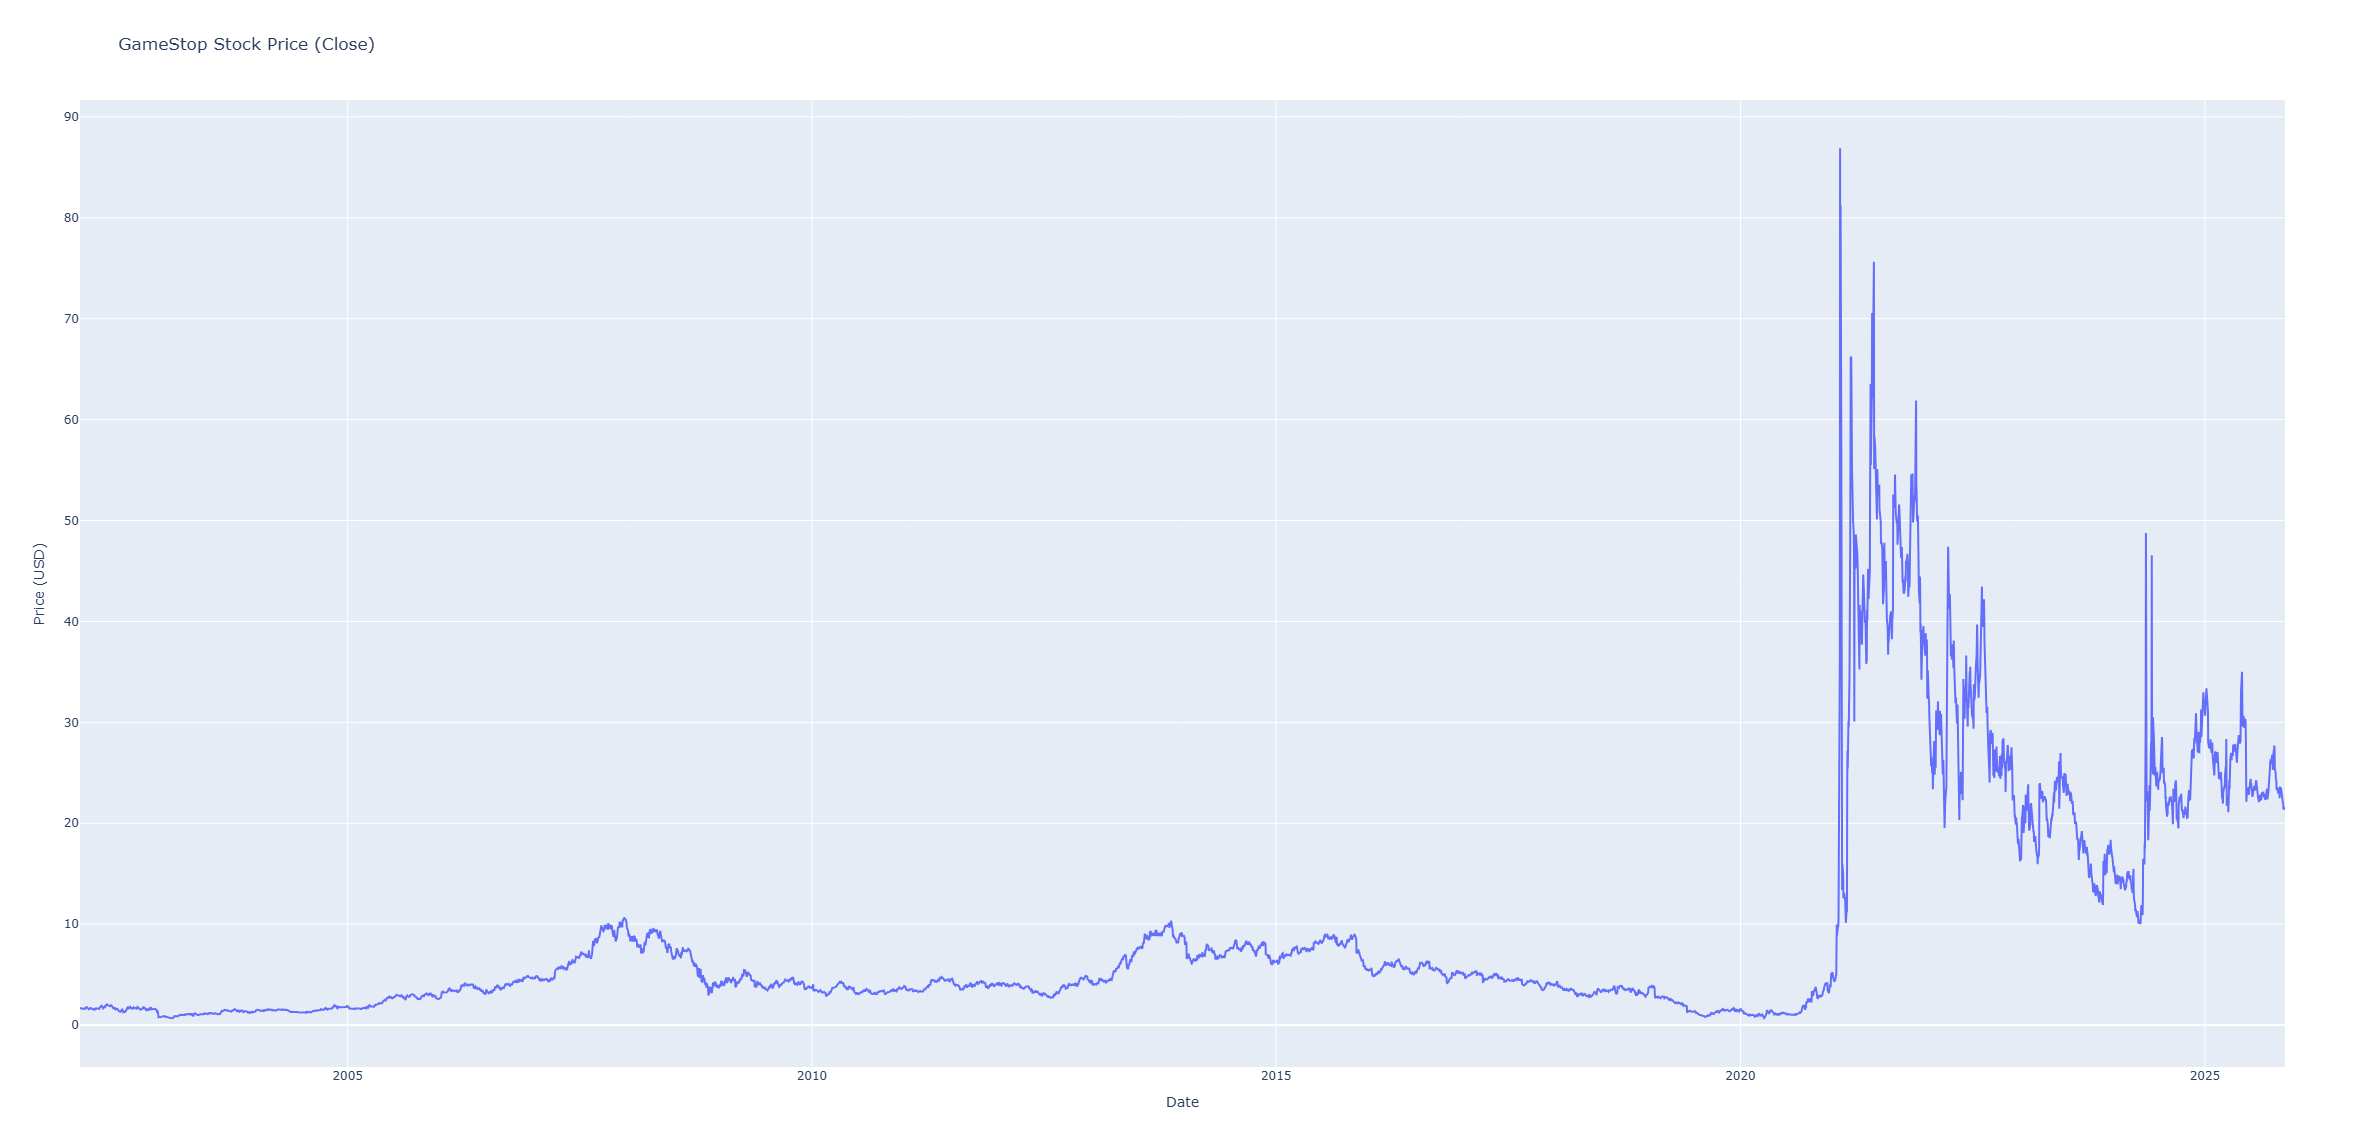

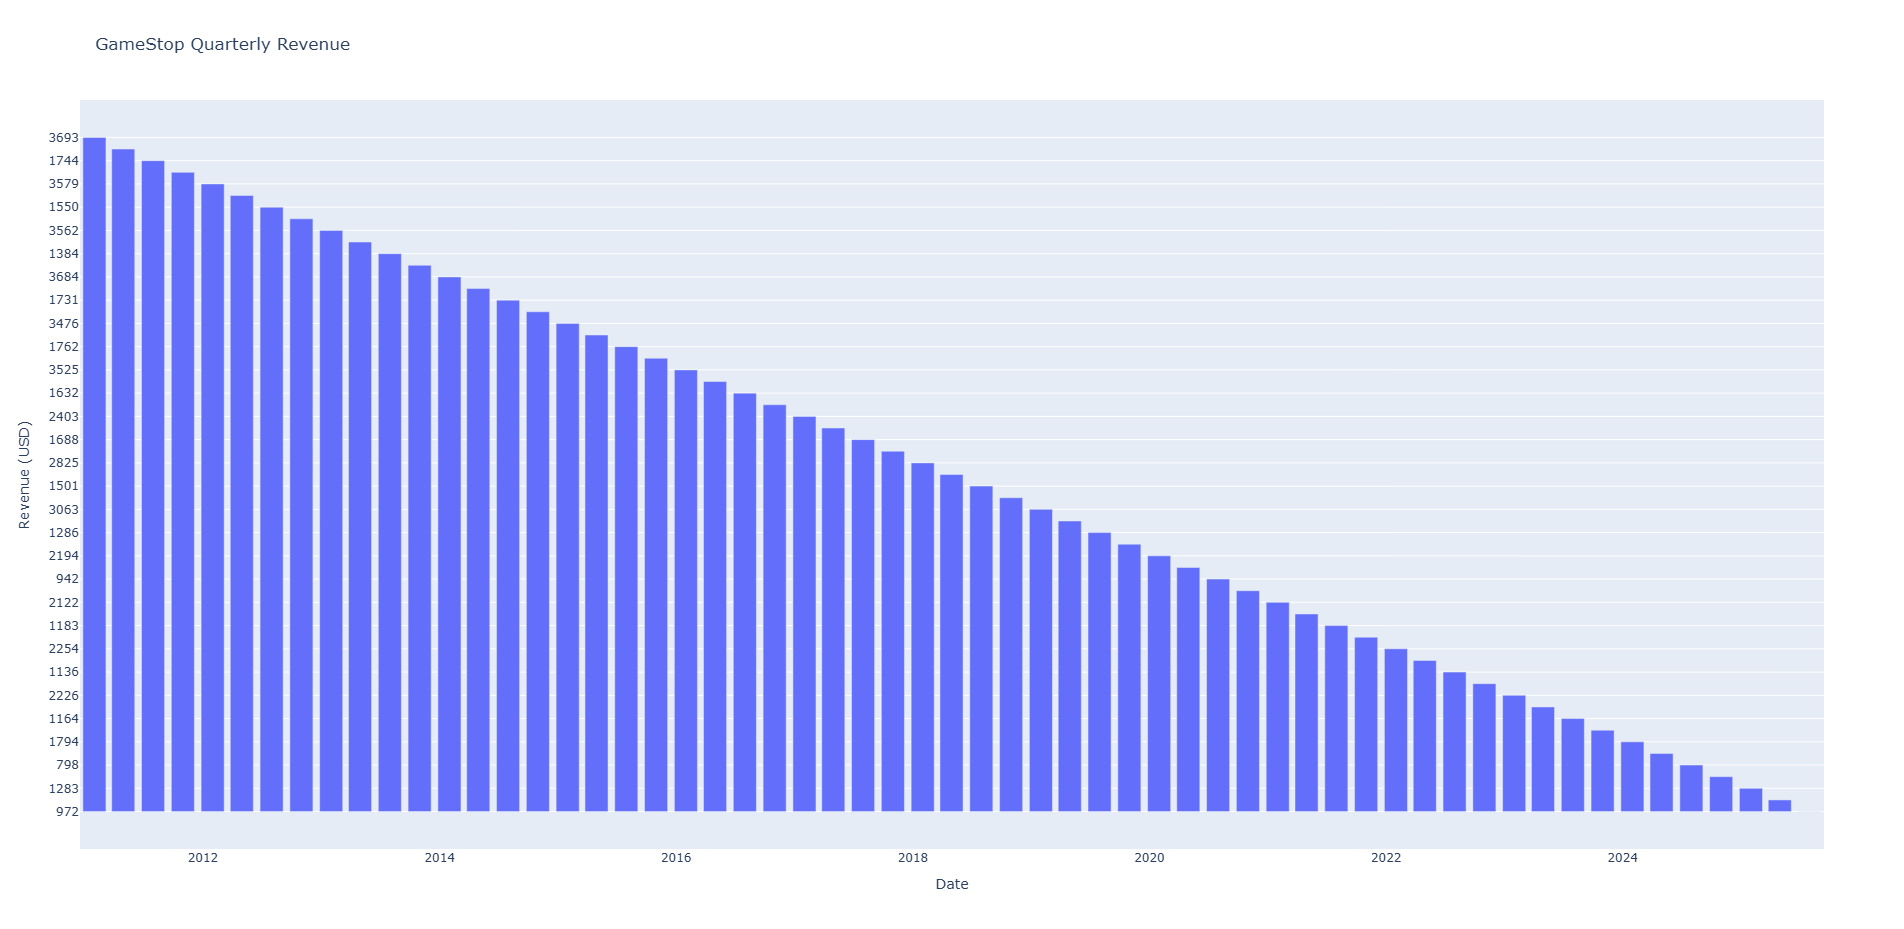

In [16]:
from IPython.display import display, Image

display(Image("gme_price.png", width=400))
display(Image("gme_revenue.png", width=400))